<a href="https://colab.research.google.com/github/SumruNayir/Regression/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [0]:
from google.colab import files 
uploaded = files.upload() 

Saving student-mat.csv to student-mat (1).csv


In [0]:
data = pd.read_csv("student-mat.csv", sep=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [0]:
# Kullanmak istediklerimizi seçmemiz gerekiyor
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4
...,...,...,...,...,...,...
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0


In [0]:
predict = "G3"
X = np.array(data.drop([predict],1)) 
Y = np.array(data[predict]) 

In [0]:
#Verilerimizin% 90'ını eğitmek, diğer% 10'unu test etmek için kullanacağız.
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y, test_size = 0.1)

In [0]:
linear = linear_model.LinearRegression()

In [0]:
#Algoritmamızın test verilerimizde ne kadar iyi performans gösterdiğini görmek için
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
acc

0.9332360953174478

In [0]:
#Grafiği oluşturmak için kullanılan sabitleri görmek istiyorsak aşağıdakileri yazabiliriz
linear.coef_

array([ 0.14520425,  0.99131485, -0.21600468, -0.26908477,  0.03706111])

In [0]:
linear.intercept_

-1.4893579079219776

In [0]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

4.720786778023947 [7 6 1 2 0] 0
9.44382382030301 [10 10  2  0  0] 10
13.529174725616445 [15 14  3  2  4] 15
10.42569622038093 [13 10  2  1 22] 11
8.674594012972523 [8 9 1 0 8] 10
3.9094727123501176 [5 5 2 0 4] 6
16.337060693734365 [16 16  2  0  2] 16
8.310626503372664 [10  9  3  0  2] 10
9.042446533554344 [11  9  2  0 12] 9
-0.6145289774983302 [9 0 2 0 0] 0
10.073862680022714 [10 10  2  0 17] 10
7.467274477251625 [8 8 2 0 8] 6
8.236222675179357 [8 9 2 0 2] 8
16.299717974936335 [14 16  1  0  3] 16
8.452508966003617 [10  9  2  0  0] 9
15.345745839434972 [16 15  2  0  2] 15
-0.904937487113143 [7 0 2 0 0] 0
7.5708508246891455 [8 9 1 3 0] 10
15.129459548610711 [14 15  2  0  4] 15
9.592068257884117 [10 10  2  0  4] 10
7.831805205656991 [10  8  2  0 10] 8
13.069385829044917 [13 13  1  0  0] 12
12.22935559510033 [12 12  1  0  8] 12
10.654465148200364 [11 11  2  0  2] 10
11.683122721297789 [13 12  3  0  1] 12
20.113907322831075 [18 19  1  0 10] 19
8.037938330753068 [7 9 1 1 2] 8
13.993222048906

In [0]:
with open("studentgrades.pickle", "wb") as f:
    pickle.dump(linear, f)

In [0]:
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

In [0]:
#TRAIN MODEL
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.1)
    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    acc
    # If the current model has a better score than one we've already trained then save it
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)



No handles with labels found to put in legend.


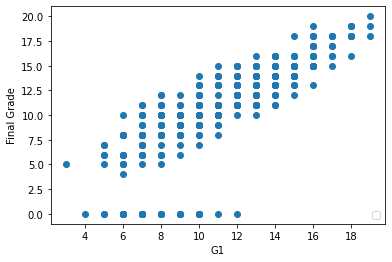

In [0]:
#Çizim model
plot = "G1" #Diğer grafikleri görmek için G1, G2, çalışma zamanı veya devamsızlık olarak değiştirin
plt.scatter(data[plot], data["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()